In [1]:
library(readxl)
library(stringr)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
actor <- read_excel("./actor_ver1.xlsx")

New names:
* `` -> ...1


In [3]:
actor <- actor[,-1]

In [4]:
colnames(actor) <- as.character(as.integer(colnames(actor)))

In [5]:
actor[9,16] <- "황정민"

In [6]:
actor

2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
안성기,장동건,송강호,전도연,송강호,이병헌,원빈,원빈,이병헌,송강호,최민식,유아인,황정민,송강호,마동석,송강호
장동건,이영애,이준기,송강호,손예진,장동건,장동건,박해일,송중기,하정우,송강호,송강호,송강호,마동석,하정우,마동석
설경구,전도연,김혜수,배용준,김혜수,설경구,강동원,장동건,김혜수,이병헌,류승룡,황정민,공유,이병헌,이병헌,공유
최민식,황정민,조승우,안성기,전도연,하지원,이병헌,김하늘,장동건,류승룡,하정우,전지현,하정우,황정민,송강호,조진웅
한석규,배용준,정준호,설경구,장동건,정지훈,송강호,공유,하정우,설경구,이병헌,하정우,유해진,하정우,주지훈,이병헌
송강호,NA,NA,NA,NA,NA,NA,NA,전지현,이정재,강동원,최민식,이병헌,설경구,유해진,하정우
신성일,NA,NA,NA,NA,NA,NA,NA,김윤석,김혜수,설경구,오달수,이정재,공유,정우성,정우성
박중후,NA,NA,NA,NA,NA,NA,NA,박보영,김수현,정우성,이정재,정우성,송중기,황정민,유해진
정우성,NA,NA,NA,NA,NA,NA,NA,안성기,장동건,현빈,강동원,전지현,정우성,조인성,황정민
원빈,NA,NA,NA,NA,NA,NA,NA,조민수,전지현,김수현,유해진,마동석,유해진,차태현,이하늬


In [7]:
write.csv(actor, "./actor_ver2.csv", row.names=F)

In [8]:
result <- c()
for (i in 1:ncol(actor)) {
    result <- append(result, unlist(actor[,i]))
}

In [9]:
table(result)

result
강동원   공유 김수현 김윤석 김하늘 김혜수 류승룡 마동석 박보영 박중후 박해일 
     3      4      2      1      1      4      2      4      1      1      1 
배용준 설경구 손예진 송강호 송중기 신성일 안성기 오달수   원빈 유아인 유해진 
     2      6      1     12      2      1      3      1      3      1      5 
이병헌 이영애 이정재 이준기 이하늬 장동건 전도연 전지현 정우성 정준호 정지훈 
     9      1      3      1      1      8      3      4      6      1      1 
조민수 조승우 조인성 조진웅 주지훈 차태현 최민식 하정우 하지원 한석규   현빈 
     1      1      1      1      1      1      3      8      1      1      1 
황정민 
     6 

In [10]:
unique(result)

[1] "안성기" "장동건" "설경구" "최민식" "한석규" "송강호" "신성일" "박중후"
 [9] "정우성" "원빈"   "이영애" "전도연" "황정민" "배용준" NA       "이준기"
[17] "김혜수" "조승우" "정준호" "손예진" "이병헌" "하지원" "정지훈" "강동원"
[25] "박해일" "김하늘" "공유"   "송중기" "하정우" "전지현" "김윤석" "박보영"
[33] "조민수" "류승룡" "이정재" "김수현" "현빈"   "유아인" "오달수" "유해진"
[41] "마동석" "주지훈" "조인성" "차태현" "조진웅" "이하늬"

In [11]:
actors <- data.frame(table(result))

In [12]:
actors <- arrange(actors, desc(Freq))

In [13]:
actors$result <- as.character(actors$result)

In [14]:
str(actors)

'data.frame':	45 obs. of  2 variables:
 $ result: chr  "송강호" "이병헌" "장동건" "하정우" ...
 $ Freq  : int  12 9 8 8 6 6 6 5 4 4 ...


In [15]:
actors[actors$result == "박중후",]

,result,Freq
26,박중후,1


In [16]:
actors[actors$result == "박중후",1] <- "박중훈"

In [17]:
data <- read.csv("./new_movie_ver2.csv", fileEncoding = "utf-8", stringsAsFactors = F)

In [18]:
str(data)

'data.frame':	922 obs. of  12 variables:
 $ 영화명    : chr  "0.0MHz" "10억" "1724 기방난동사건" "1987" ...
 $ 누적매출액: num  1.09e+09 3.11e+09 1.90e+09 5.82e+10 1.73e+09 ...
 $ 누적관객수: int  137294 433866 288452 7232387 218795 2535450 2963652 67602 26962 96080 ...
 $ 스크린수  : int  446 252 340 1299 512 340 611 170 132 191 ...
 $ 상영횟수  : int  5998 12744 19036 138226 11357 54566 50679 4904 3825 5041 ...
 $ 개봉일    : chr  "2019-05-29" "2009-08-06" "2008-12-03" "2017-12-27" ...
 $ 배급사    : chr  "(주)스마일이엔티" "(주)싸이더스" "(주)싸이더스" "(주)씨제이이엔엠" ...
 $ 등급      : chr  "15세이상관람가" "15세이상관람가" "15세이상관람가" "15세이상관람가" ...
 $ 장르      : chr  "공포(호러)" "스릴러,어드벤처" "사극,액션,코미디" "드라마" ...
 $ 감독      : chr  "유선동" "조민호" "여균동" "장준환" ...
 $ 배우      : chr  "정은지,이성열,최윤영,신주환,정원창,박명신,남관효,박대희,노혜영,서진석,김대현,신승민,오규택,오세규,오제헌,김성우"| __truncated__ "박해일,신민아,박희순,고은아,정유미,이민기,이천희,성기완,박준하,안정희,강왕수,유정아,윤성재,최서우,최무성,신동미"| __truncated__ "이정재,김석훈,김옥빈,이원종,김수남,김현우,이광희,김효열,김은식,황혜영,한대희,김기종,김경록,한진,김대욱,우영제,"| __truncated__ "안대겸,김윤석,하정우,유해진,김태리,박희순,이희준,설경구,여진구,윤재국

In [196]:
nrow(subset(data, 누적관객수 > 10000000))

[1] 17

In [19]:
data[820,]

,영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,배우,제작사
820,택시운전사,95871287649,12189654,1906,184200,2017-08-02,(주)쇼박스,15세이상관람가,드라마,장훈,"이수민,송강호,토마스 크레취만,유해진,류준열,박혁권,최귀화,이창섭,이호균,서정우,송병철,안용우,오석규,윤석진,이새별,이성호,이정은,이주영,황민형,김신웅,김진상,김화목,차순배,김대현,서현우,이봉련,홍완표,문광식,류성현,백인권,허정도,손경원,한사명,한이진",더램프(주)


In [20]:
actors[2,1] %in% unlist(str_split(data$배우[820],","))

[1] FALSE

In [21]:
count_mean <- c()
count_actor <- c()
for (j in 1:nrow(actors)) {
    temp <- c()
    for (i in 1:nrow(data)) {
        if(actors[j,1] %in% unlist(str_split(data$배우[i],","))) {
            temp <- append(temp,i)
        }
    }
    count_actor <- append(count_actor,length(temp))
    count_mean <- append(count_mean, round(mean(data[temp,3])))
}

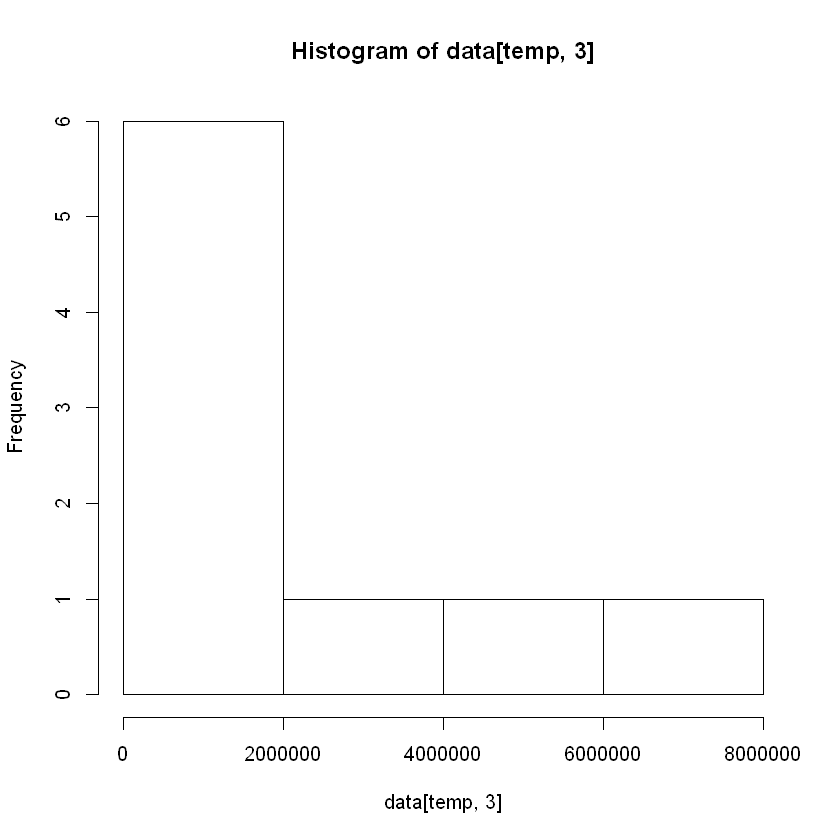

In [22]:
hist(data[temp,3])
options(scipen = 100)

In [23]:
count_mean

[1] 5369293 4061551 1852273 4537951 2522805 2524438 3302261 3546921 3612462
[10] 3089893 3549326 5936106 3620726 2312338 3370325 5979599 1759208 3499209
[19] 2504270 3985345  678786 3045520 3274141 2885924 2368512 2878197 2563324
[28] 2551516 2904613 4027254 3130835 1882382 4471920 3028090 2056173 3417402
[37] 2486237 3178911 4084475 2624511 4248534 2836250 1919260 1484455 2352393

In [24]:
actors <- cbind(actors, count_mean, count_actor)

[1] 2374982

In [169]:
test <- subset(data, 영화명 != "명량" & 영화명 != "극한직업")

In [170]:
test <- subset(test, 누적관객수 > 2000000)

In [171]:
nrow(test)

[1] 207

In [178]:
shapiro.test(test2$누적관객수)


	Shapiro-Wilk normality test

data:  test2$누적관객수
W = 0.86545, p-value = 0.000000000004632


In [173]:
a <- as.numeric(1.5*(quantile(test$누적관객수)[4] - quantile(test$누적관객수)[2]))
a

[1] 4628221

In [174]:
nrow(arrange(subset(test, 누적관객수 > as.numeric(quantile(test$누적관객수)[4] + a)), desc(누적관객수)))
arrange(subset(test, 누적관객수 > as.numeric(quantile(test$누적관객수)[4] + a)), desc(누적관객수))

[1] 14

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,배우,제작사
신과함께-죄와 벌,115707627637,14411775,1912,213315,2017-12-20,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"판타지,드라마",김용화,"하정우,차태현,주지훈,김향기,마동석,김동욱,도경수,오달수,임원희,장광,정해균,김수안,이정재,김해숙,이경영,김하늘,최용훈,강소백,정수윤,이수봉,이승준,이지향,김태준,정지훈,예수정,김기태,성유빈,오희준,이준혁,유수빈,윤지온,임철수,나철,강길우,김민종,홍인,정순원,김그림,박윤호,양지수,김지나","리얼라이즈픽쳐스(주),(주)덱스터스튜디오"
국제시장,110930943730,14261581,1044,212664,2014-12-17,(주)씨제이이엔엠,12세이상관람가,드라마,윤제균,"황정민,김윤진,오달수,정진영,장영남,라미란,김슬기,정영기,맹세창,김동원,김현중,김지영,황창기,박재우,박찬희,김예빈,김재철,김하연,김재현,이소영,류경현,황인준,이종석,이진희,전희경,박재언,유재상,김선영,정윤호,박길수,박영수,김근영,허동원,현봉식,강신철,손영순,박혜진,유정호,남진복,신정섭","(주)제이케이필름,(주)씨제이이엔엠"
베테랑,105169264250,13414200,1115,199240,2015-08-05,(주)씨제이이엔엠,15세이상관람가,"액션,드라마",류승완,"황정민,유아인,유해진,오달수,장윤주,김시후,오대환,정웅인,정만식,송영창,진경,유인영,박소담,이동휘,배성우,천호진,이채은,조덕현,신지수,권지훈,정윤헌,장한승,김선웅,김성종,우영택,김민재,김재현,김태용,김지수,박지윤,박지혜,손성민,장소연,유재명,배제기,류아벨,정재헌,안길강,마동석,김응수,고규필,서현우,강영묵,한성천,김기천,이문석,이상희,김서원","(주)외유내강,(주)필름케이"
도둑들,93665568500,12983330,1091,155393,2012-07-25,(주)쇼박스,15세이상관람가,"액션,범죄",최동훈,"김윤석,김혜수,이정재,전지현,임달화,김해숙,오달수,김수현,이심결,증국상,서영주,장동,장현문,정윤헌,조상원,한규석,홍원기,김영민,최덕문,최진호,장준녕,예수정,김영웅,이은채,손병욱,이동진",(주)케이퍼필름
7번방의 선물,91431950670,12811213,866,166817,2013-01-23,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"코미디,드라마",이환경,"류승룡,박신혜,갈소원,정진영,오달수,박원상,김정태,정만식,김기천,장호준,김동민,박수진,박유경,박정배,조덕현,박상면,조재윤,박길수,이승연,김봉수,정희태,이윤희,오창경,한이진","(주)화인웍스,(주)씨엘엔터테인먼트"
암살,98466287781,12706483,1519,175211,2015-07-22,(주)쇼박스,15세이상관람가,"액션,드라마",최동훈,"전지현,이정재,하정우,오달수,조진웅,이경영,최덕문,김의성,박병은,김홍파,강용빈,홍성지,지동주,장현석,장용현,김민지,김승찬,안태랑,김예은,김정석,김정호,김지원,박상민,박정환,조승우,김해숙,진경,박소은,김인우,심희섭,김태준,차지원,강영묵,정기섭,금새록,원현준,안민영,허지원,곽자형,허정도,유정호,정인겸,김서원,김준우",(주)케이퍼필름
"광해, 왕이 된 남자",88907726769,12323291,1001,203428,2012-09-13,(주)씨제이이엔엠,15세이상관람가,"사극,드라마",추창민,"이병헌,류승룡,한효주,장광,김인권,심은경,김명곤,서진원,장재현,정창국,조혜정,김남준,이수용,박윤호,김지수,박민규,박지아,송미정,양준모,원동연,김종구,주영호,이엘,전배수,이란희,최욱,이봉련,허성태,이양희,전국향,김승훈,권은수,승의열,김비비,한이진,이은정","리얼라이즈픽쳐스(주),(주)씨제이이엔엠"
신과함께-인과 연,102677675409,12276350,2235,180042,2018-08-01,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,"판타지,드라마",김용화,"하정우,주지훈,김향기,마동석,김동욱,이정재,김기태,오희준,도경수,이준혁,이수봉,이용희,이우주,이우주,이준혁,이지향,이지향,이지혜,김지안,김철구,김태준,안용우,김학충,노남석,장재욱,전종석,박지선,박찬영,정진영,정지훈,권훈,권수정,김대근,김대현,김동욱,김민석,안지호,강민,조한철,임철수,민무제,강신철,홍기준,장광,정아미,김민종,홍인,류제승,최현종,김그림,양지수,강재은,전승재,정진영","리얼라이즈픽쳐스(주),(주)덱스터스튜디오"
택시운전사,95871287649,12189654,1906,184200,2017-08-02,(주)쇼박스,15세이상관람가,드라마,장훈,"이수민,송강호,토마스 크레취만,유해진,류준열,박혁권,최귀화,이창섭,이호균,서정우,송병철,안용우,오석규,윤석진,이새별,이성호,이정은,이주영,황민형,김신웅,김진상,김화목,차순배,김대현,서현우,이봉련,홍완표,문광식,류성현,백인권,허정도,손경원,한사명,한이진",더램프(주)
부산행,93182579048,11566862,1788,151350,2016-07-20,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"액션,스릴러",연상호,"공유,김정희,정유미,김율호,이주원,이영욱,마동석,김찬호,김운,최우식,안소희,김의성,김수안,박민우,박민혁,임종훈,박종관,장문성,박혜진,손지훈,손지훈,연상호,조춘호,지동현,윤미중,이동하,이윤상,최창수,편준의,허성우,황유경,최용훈,김근영,이주실,예수정,김대현,한지은,박명신,이육헌,김시우,백인권,차청화,류성록,주광현",(주)영화사레드피터


In [175]:
test2 <- subset(test, 누적관객수 <= as.numeric(quantile(test$누적관객수)[4] + a))

In [181]:
nrow(test2)

[1] 193

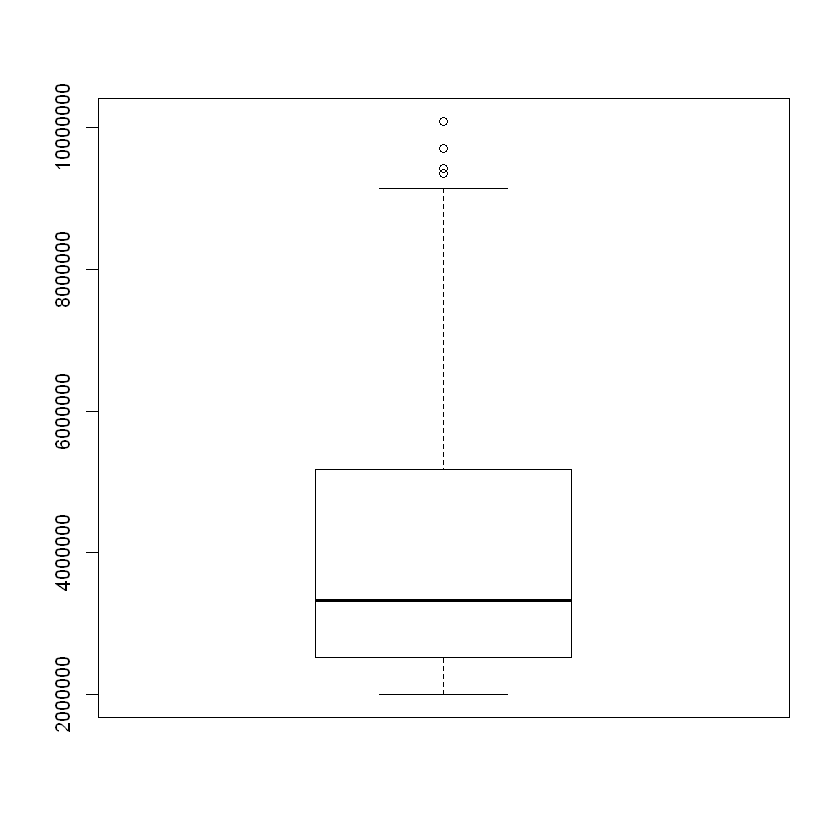

In [177]:
boxplot(test2$누적관객수)

In [185]:
max(test2$누적관객수)
min(test2$누적관객수)
shapiro.test(test2$누적관객수)

[1] 10085275

[1] 2002423


	Shapiro-Wilk normality test

data:  test2$누적관객수
W = 0.86545, p-value = 0.000000000004632


In [25]:
actors

result,Freq,count_mean,count_actor
송강호,12,5369293,19
이병헌,9,4061551,15
장동건,8,1852273,8
하정우,8,4537951,26
설경구,6,2522805,24
정우성,6,2524438,15
황정민,6,3302261,42
유해진,5,3546921,37
공유,4,3612462,10
김혜수,4,3089893,13


In [188]:
nrow(test2)

[1] 193

In [193]:
write.csv(test2, "./withoutOutlier.csv", row.names = F)
write.csv(test2, "./test.csv", row.names=F)

In [194]:
str(test2)

'data.frame':	193 obs. of  12 variables:
 $ 영화명    : chr  "1987" "1번가의 기적" "26년" "7광구" ...
 $ 누적매출액: num  58169776145 15494122100 21242367145 19391653500 26380710000 ...
 $ 누적관객수: int  7232387 2535450 2963652 2242510 4039891 3678156 2598859 2368267 4529876 2924563 ...
 $ 스크린수  : int  1299 340 611 812 475 1486 444 537 351 1073 ...
 $ 상영횟수  : int  138226 54566 50679 47346 90779 145441 51434 48432 61009 111527 ...
 $ 개봉일    : chr  "2017-12-27" "2007-02-14" "2012-11-29" "2011-08-04" ...
 $ 배급사    : chr  "(주)씨제이이엔엠" "CJ ENM" "(주)인벤트스톤,영화사청어람(주)" "(주)씨제이이엔엠" ...
 $ 등급      : chr  "15세이상관람가" "15세이상관람가" "15세이상관람가" "15세이상관람가" ...
 $ 장르      : chr  "드라마" "드라마,코미디" "액션,드라마" "SF,액션,스릴러" ...
 $ 감독      : chr  "장준환" "윤제균" "조근현" "김지훈" ...
 $ 배우      : chr  "안대겸,김윤석,하정우,유해진,김태리,박희순,이희준,설경구,여진구,윤재국,지웅배,정재윤,이가영,이동욱,이동희,이상준"| __truncated__ "하지원,임창정,강예원,정두홍,박용주,신윤주,남동협,채백호,최광섭,김서경,곽진석,오수현,이규원,주현,이용녀,김희원,"| __truncated__ "진구,한혜진,임슬옹,배수빈,이경영,장광,천우희,이현걸,전종석,정광재,지성용,김병오,이상훈,이경영,정현진,이미도,조"| __truncated__ "하지원,

In [192]:
test2

,영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,배우,제작사
4,1987,58169776145,7232387,1299,138226,2017-12-27,(주)씨제이이엔엠,15세이상관람가,드라마,장준환,"안대겸,김윤석,하정우,유해진,김태리,박희순,이희준,설경구,여진구,윤재국,지웅배,정재윤,이가영,이동욱,이동희,이상준,이태형,최광일,강동원,문소리,문성근,김원진,남민우,이주영,임병우,김시은,김기태,정재윤,황성준,서현우,조민준,박지환,박명신,김푸름,이화룡,이창훈,이신성,김수진,박경혜,김국희,황정민,한준우,정승길,현봉식,강신철,한성천,나철,김승훈,정인기,양조아,최교식,이장유,김경덕,최현종,정순원,이하영,유정호,곽진석,박혁민,염석무,이범규",(주)우정필름
6,1번가의 기적,15494122100,2535450,340,54566,2007-02-14,CJ ENM,15세이상관람가,"드라마,코미디",윤제균,"하지원,임창정,강예원,정두홍,박용주,신윤주,남동협,채백호,최광섭,김서경,곽진석,오수현,이규원,주현,이용녀,김희원,박영수,정민성,곽진석",(주)두사부필름
7,26년,21242367145,2963652,611,50679,2012-11-29,"(주)인벤트스톤,영화사청어람(주)",15세이상관람가,"액션,드라마",조근현,"진구,한혜진,임슬옹,배수빈,이경영,장광,천우희,이현걸,전종석,정광재,지성용,김병오,이상훈,이경영,정현진,이미도,조덕제,김의성,김도윤,김태준,김기천,이상훈,정희태,한사명,박서연",영화사청어람(주)
14,7광구,19391653500,2242510,812,47346,2011-08-04,(주)씨제이이엔엠,15세이상관람가,"SF,액션,스릴러",김지훈,"하지원,박철민,김성태,차예련,이한위,오지호,송새벽,안성기,박원희,김형석,박정학,배명호,장동원,정상용,박영수,오민석,정인기","(주)제이케이필름,(주)씨제이이엔엠"
15,7급 공무원,26380710000,4039891,475,90779,2009-04-22,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,"김하늘,강지환,유승목,강규영,김민국,강신일,장남열,심은혜,나귀화,서정주,천성일,민홍남,이상욱,박병렬,정경민,이수지,임성현,김재훈,김철남,이가현,서민경,이정선,김은주,손호승,김형범,장영남,리우진,이창훈,김승훈,오연아,박지영","(주)하리마오픽쳐스,(주)영화사수작,(주)디씨지플러스"
19,82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,"이시영,정유미,공유,김미경,공민정,박성연,이봉련,김성철,이얼,전국향,박세현,김미경,손성찬,강애심,김정영,예수정,염혜란,김해나,어성욱,권귀빈,류아영,김하연,강별,기소유,이나윤,유준후,김용준,이지혜,우지현,이성욱,김지수,윤서진,김미지,이재인,이주원,원춘규,김해나,정준,김금순,윤사봉,정형석,손규원,신태양,최희진,박수진,김국희,정선아,김선미,이음,이승용,조백한,오해주,오일영,우도임,구재연,정태성,허태경,권지숙,백효성,김철진,김규도,김영표,김성태,김지우,송윤,이해운,최수빈,김남진,김선혜,주인영,조예린,고재원,천문정,정선아,김정원,예수정,염혜란",(주)봄바람영화사
31,가문의 부활 - 가문의 영광3,15996330400,2598859,444,51434,2006-09-21,(주)쇼박스,15세관람가,코미디,정용기,"신현준,김원희,김수미,탁재훈,김도연,김응수,강병조,김홍규,임형준,박영식,백승주,고영식,고영식,권오태,서명석,서명석,서명석,서승인,김경준,민수진,유경미,장지은,이승철,오상만,이한글,공형진,정준하,김용건,김해곤,신이,장준휘,이민웅",(주)태원엔터테인먼트
32,가문의 영광4 - 가문의 수난,17792219500,2368267,537,48432,2011-09-07,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,코미디,정태원,"김수미,신현준,임형준,정준하,탁재훈,현영,허필봉,정웅인,박정호,박정환,한용환,모상범,임정빈,여기한,오석규,이창세,김지우,김성주,정만식,김화섭",(주)태원엔터테인먼트
34,가문의 위기(가문의 영광2),28622355500,4529876,351,61009,2005-09-07,(주)쇼박스,15세관람가,코미디,정용기,"신현준,김수미,김원희,최은주,김효진,박은혜,임형준,한재혁,김인욱,이화란,장지영,김재희,장서윤,이미도,공형진,정준하,탁재훈,정호빈,최욱,김해곤,신이",(주)태원엔터테인먼트
39,가장 보통의 연애,24885803430,2924563,1073,111527,2019-10-02,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"멜로/로맨스,코미디",김한결,"김래원,공효진,강기영,정웅인,장소연,이채은,정혜린,손우현,박근록,주민경,지일주,오동민,성병숙,차엽,윤경호,차중원,신민재,손영순,손산,이승찬,조재완,김연철,김영,배현성,조지현,송예진,정현규,심소연,손성찬,조영복,최정원,최지원,강소연,유하성,송규용,정미란,한예성,임지형,이건희,김진옥,박인영,이윤재,강은수,홍민성,민지안,임유란,송필근,손여은",영화사 집


In [2]:
a <- read.csv("./temp_actors.csv", fileEncoding = "utf-8", stringsAsFactors = F)

In [8]:
a <- a[,-1]

In [10]:
a[is.na(a$배우),]

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,배우,제작사,cluster
